# The Airbnb Price Predictor: A Data-Driven Framework for Market Valuation


## 1. Data Exploration and Preprocessing

### Step 1: Import Libraries and Load the Data

In [69]:
# Importing essential libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast  # For safely evaluating the amenities string literal

# Setting up visualization style for better aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('Airbnb_data - airbnb_data.csv')

# Display the first 5 rows to get an initial overview
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


### Step 2: Initial Data Overview

In [108]:
# 1. Get a high-level summary of the DataFrame
print("--- Dataset Info ---")
df.info()

# 2. Generate descriptive statistics for numerical columns
print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

# 3. Generate descriptive statistics for categorical/object columns
print("\n--- Descriptive Statistics for Categorical Columns ---")
print(df.describe(include=['object', 'bool']))

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_ver

### Step 3: Analyze Missing Values

--- Summary of Missing Values ---
                        Missing Values  Percentage (%)
host_response_rate               18299       24.691341
review_scores_rating             16722       22.563452
first_review                     15864       21.405729
last_review                      15827       21.355804
thumbnail_url                     8216       11.086074
neighbourhood                     6872        9.272578
zipcode                            968        1.306149
bathrooms                          200        0.269865
host_has_profile_pic               188        0.253674
host_identity_verified             188        0.253674
host_since                         188        0.253674
beds                               131        0.176762
bedrooms                            91        0.122789


C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\1062427970.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_summary.index, y='Percentage (%)', data=missing_summary, palette='Reds_r')


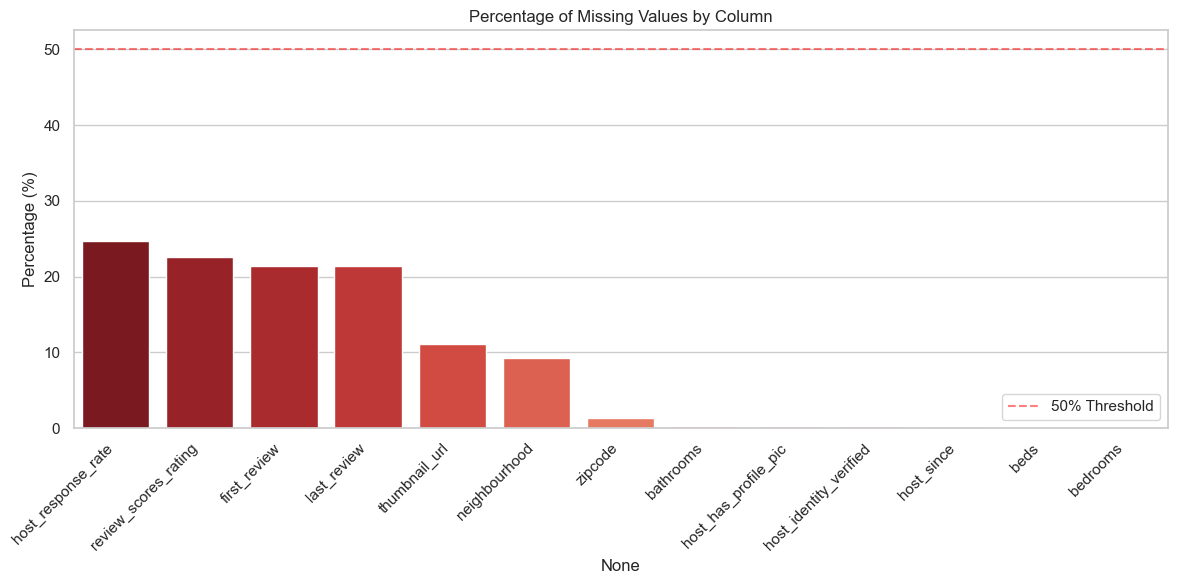

In [11]:
# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame for missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage
})

# Sort the columns by percentage of missing values, descending order
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False)

print("--- Summary of Missing Values ---")
if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print(missing_summary)

# Visualize the missing data
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y='Percentage (%)', data=missing_summary, palette='Reds_r')
plt.axhline(50, color='red', linestyle='--', alpha=0.5, label='50% Threshold')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Step 4: Analyze Trends and Data Types

In [13]:
# Check the data types of each column
print("--- Current Data Types ---")
print(df.dtypes)

# Identify columns that might be incorrectly typed (e.g., dates as strings)
# We see 'first_review', 'last_review', 'host_since' are likely dates but are probably objects/strings.
# 'host_response_rate' is a string with a '%' sign.
# 'amenities' is a string representation of a list.

# Let's examine unique values for some key categorical columns to understand their composition
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
for col in categorical_columns:
    print(f"\n--- Unique values for '{col}': ({df[col].nunique()}) ---")
    print(df[col].value_counts().head(10)) # Show top 10 most frequent categories

--- Current Data Types ---
id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                 

### Step 5: Initial Outlier Detection (Numerical Columns)

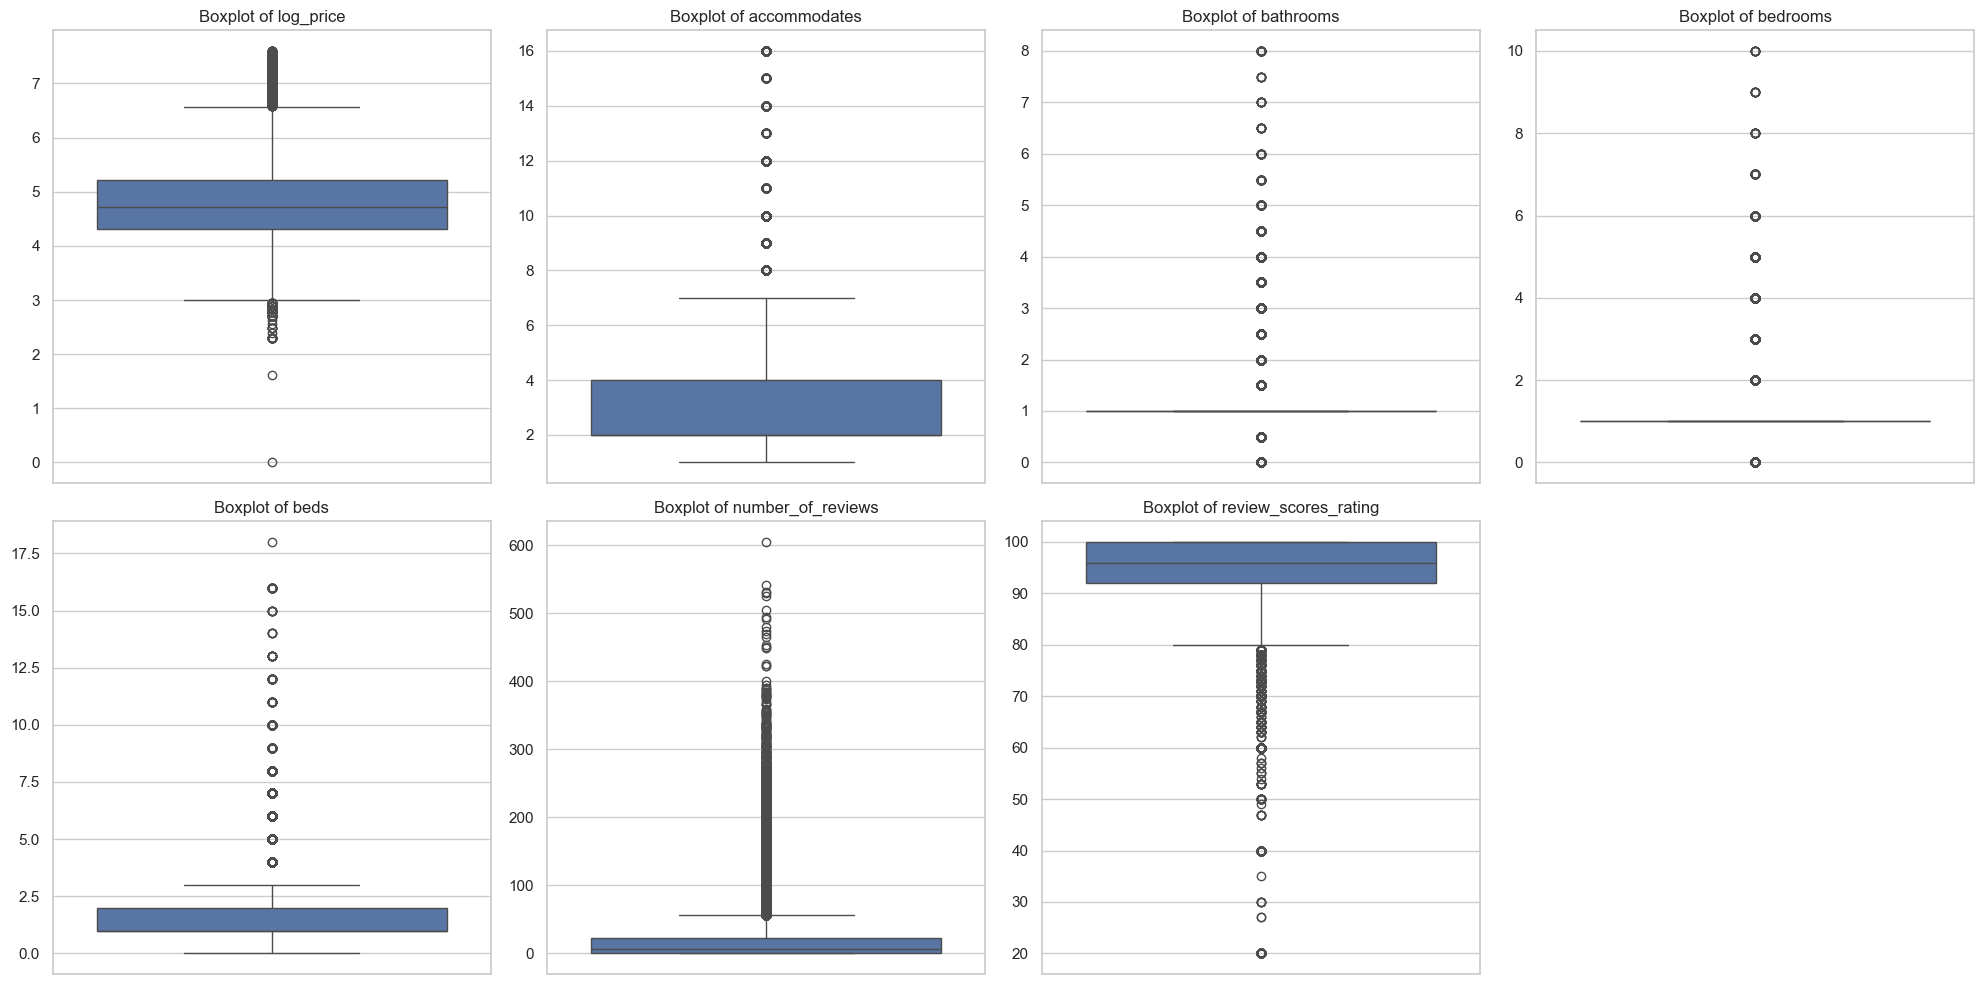


--- Potential Outliers (IQR Method) ---
log_price: 1532 potential outlier(s)
accommodates: 3604 potential outlier(s)
bathrooms: 15812 potential outlier(s)
bedrooms: 24236 potential outlier(s)
beds: 5686 potential outlier(s)
number_of_reviews: 8203 potential outlier(s)
review_scores_rating: 1719 potential outlier(s)


In [15]:
# Select key numerical columns for outlier analysis
numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']

# Create boxplots for each numerical column
fig, axes = plt.subplots(2, 4, figsize=(20, 10)) # 2 rows, 4 columns
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('')

# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# For a more quantitative look, we can use the IQR method
print("\n--- Potential Outliers (IQR Method) ---")
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outlier(s)")

In [17]:
for col in df.columns:
    print(f"{col} → {df[col].dtype}")

id → int64
log_price → float64
property_type → object
room_type → object
amenities → object
accommodates → int64
bathrooms → float64
bed_type → object
cancellation_policy → object
cleaning_fee → bool
city → object
description → object
first_review → object
host_has_profile_pic → object
host_identity_verified → object
host_response_rate → object
host_since → object
instant_bookable → object
last_review → object
latitude → float64
longitude → float64
name → object
neighbourhood → object
number_of_reviews → int64
review_scores_rating → float64
thumbnail_url → object
zipcode → object
bedrooms → float64
beds → float64


### Step 6: Data Cleaning - Handling Missing Values

In [19]:
# Make a copy of the dataframe to avoid modifying the original data
df_clean = df.copy()

# 1. Handle Numerical Columns (float64, int64) - Fill with Median
numerical_cols_to_fill = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
for col in numerical_cols_to_fill:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_value}")

# 2. Handle Categorical Columns (object) - Fill with Mode
# First, let's handle the general categorical columns
categorical_cols_to_fill = ['neighbourhood', 'zipcode', 'host_response_rate']
for col in categorical_cols_to_fill:
    mode_value = df_clean[col].mode()[0] # mode() returns a Series, we take the first value
    df_clean[col].fillna(mode_value, inplace=True)
    print(f"Filled missing values in '{col}' with mode: {mode_value}")

# 3. Handle Boolean Columns (currently stored as 'object' with 't'/'f') - Fill with Mode
# These will be converted to proper booleans/int later
boolean_cols_to_fill = ['host_has_profile_pic', 'host_identity_verified']
for col in boolean_cols_to_fill:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)
    print(f"Filled missing values in '{col}' with mode: '{mode_value}'")

# 4. Handle Date Columns (object) - Fill with a placeholder date or leave as NaT
# A common strategy is to fill with a date far in the past/future to denote "missing"
# Alternatively, we can extract features (e.g., days since joined) and then handle the missingness there.
# We'll fill with a placeholder for now and convert them in the next step.
date_cols_to_fill = ['first_review', 'last_review', 'host_since']
placeholder_date = '01-01-1900' # Using a very old date as a placeholder

for col in date_cols_to_fill:
    df_clean[col].fillna(placeholder_date, inplace=True)
    print(f"Filled missing values in '{col}' with placeholder: '{placeholder_date}'")

# 5. Handle Special Columns
# --- thumbnail_url: A missing URL means no thumbnail image. Fill with a string "Not Available".
df_clean['thumbnail_url'].fillna('Not Available', inplace=True)
print("Filled missing values in 'thumbnail_url' with 'Not Available'")

# --- amenities: An empty amenities list is possible. We will handle this when we parse the string into a list.
# For now, we can check if there are any nulls and fill them with an empty list string.
if df_clean['amenities'].isnull().sum() > 0:
    df_clean['amenities'].fillna('[]', inplace=True) # Fill with an empty list representation
    print("Filled missing values in 'amenities' with '[]'")
else:
    print("No missing values found in 'amenities'.")

# 6. Verify that all missing values have been handled
print("\n" + "="*50)
print("VERIFICATION: Missing Values After Cleaning")
print("="*50)

missing_after = df_clean.isnull().sum()
missing_cols_after = missing_after[missing_after > 0]

if missing_cols_after.empty:
    print("SUCCESS: No missing values remain in the dataset.")
else:
    print("WARNING: The following columns still have missing values:")
    print(missing_cols_after)

Filled missing values in 'bathrooms' with median: 1.0
Filled missing values in 'bedrooms' with median: 1.0
Filled missing values in 'beds' with median: 1.0
Filled missing values in 'review_scores_rating' with median: 96.0
Filled missing values in 'neighbourhood' with mode: Williamsburg
Filled missing values in 'zipcode' with mode: 11211
Filled missing values in 'host_response_rate' with mode: 100%
Filled missing values in 'host_has_profile_pic' with mode: 't'
Filled missing values in 'host_identity_verified' with mode: 't'
Filled missing values in 'first_review' with placeholder: '01-01-1900'
Filled missing values in 'last_review' with placeholder: '01-01-1900'
Filled missing values in 'host_since' with placeholder: '01-01-1900'
Filled missing values in 'thumbnail_url' with 'Not Available'
No missing values found in 'amenities'.

VERIFICATION: Missing Values After Cleaning
SUCCESS: No missing values remain in the dataset.


C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\1197590654.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\1197590654.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

### Step 7: Feature Engineering & Transformations

In [29]:
# Make a copy of the cleaned dataframe to work on
df_fe = df_clean.copy()


# 1. Convert Data Types to Proper Formats #


print("Converting data types...")

# Convert date columns from string to datetime
date_columns = ['first_review', 'last_review', 'host_since']
for col in date_columns:
    df_fe[col] = pd.to_datetime(df_fe[col], format='%d-%m-%Y', errors='coerce') # Coerce errors to NaT
print(f"Converted {date_columns} to datetime.")

# Convert 't'/'f' and 'TRUE'/'FALSE' to integers 1/0
bool_cols_mapping = {
    'host_has_profile_pic': {'t': 1, 'f': 0, 'TRUE': 1, 'FALSE': 0},
    'host_identity_verified': {'t': 1, 'f': 0, 'TRUE': 1, 'FALSE': 0},
    'instant_bookable': {'t': 1, 'f': 0, 'TRUE': 1, 'FALSE': 0}
}
# Also handle the existing boolean column 'cleaning_fee' for consistency
df_fe['cleaning_fee'] = df_fe['cleaning_fee'].astype(int)

for col, mapping in bool_cols_mapping.items():
    df_fe[col] = df_fe[col].map(mapping).fillna(0).astype(int) # Fill any unexpected values with 0
print(f"Converted boolean columns to integers 1/0.")

# Clean and convert 'host_response_rate' from string "%" to float ratio
df_fe['host_response_rate'] = (
    df_fe['host_response_rate']
    .str.replace('%', '', regex=False) # Remove the percentage sign
    .astype(float)        # Convert to float
    / 100.0               # Divide by 100 to get a ratio
)
print("Converted 'host_response_rate' to float ratio.")


# 2. Feature Engineering: Create New Features #


print("\nEngineering new features...")

# --- A. Engineered Features from Dates ---
# Calculate host experience in days
today = pd.to_datetime('today')
df_fe['host_experience_days'] = (today - df_fe['host_since']).dt.days

# Calculate listing review activity period (if reviewed)
df_fe['review_activity_days'] = (df_fe['last_review'] - df_fe['first_review']).dt.days
# For listings with no reviews, this will be NaN. Let's fill with 0.
df_fe['review_activity_days'].fillna(0, inplace=True)

# Calculate days since the last review (recency)
df_fe['days_since_last_review'] = (today - df_fe['last_review']).dt.days
# For listings with no last review (NaT), this will be NaN. Also handles our 1900 placeholder.
# Fill a very large number for missing values and then cap it.
max_days_since_review = 365 * 5 # 5 years
df_fe['days_since_last_review'].fillna(max_days_since_review, inplace=True)
df_fe['days_since_last_review'] = df_fe['days_since_last_review'].clip(upper=max_days_since_review)
print("Created date-based features: 'host_experience_days', 'review_activity_days', 'days_since_last_review'.")

# --- B. Engineered Features from Amenities ---
# SAFELY Convert the string representation of list to an actual list
# Define a function to safely parse the amenities string
def safe_parse_amenities(amenity_str):
    """
    Safely parses the amenities string into a list.
    Handles strings that are representations of Python lists.
    If parsing fails, returns an empty list.
    """
    try:
        # Attempt to evaluate the string as a Python literal
        return ast.literal_eval(amenity_str)
    except (ValueError, SyntaxError):
        # If it fails (e.g., due to single quotes, malformed string), try a fallback
        # Common issue: strings are enclosed in single quotes for JSON-like format
        try:
            # Remove outer brackets and split by comma, then clean each item
            cleaned_str = amenity_str.strip('[]')
            if not cleaned_str:
                return []
            # Split by comma and remove extra quotes and spaces
            amenity_list = [item.strip().strip('"').strip("'") for item in cleaned_str.split(',')]
            return amenity_list
        except:
            # If all else fails, return an empty list
            return []

# Apply the safe parsing function
df_fe['amenities_list'] = df_fe['amenities'].apply(safe_parse_amenities)

# Create a new feature: count of amenities
df_fe['amenities_count'] = df_fe['amenities_list'].apply(len)
print("Created 'amenities_count' feature.")

# Identify key amenities and create binary flags for them
# Flatten the list of all amenities and count their frequency
from collections import Counter
all_amenities = [amenity for sublist in df_fe['amenities_list'] for amenity in sublist]
amenity_counts = Counter(all_amenities)

# Get the top 20 most common amenities
top_amenities = [amenity for amenity, count in amenity_counts.most_common(20)]
print("\nTop 20 most common amenities:")
for amenity, count in amenity_counts.most_common(20):
    print(f"{amenity}: {count}")

# Choose prevalent and potentially impactful amenities based on the output.
key_amenities = [
    "Wireless Internet", "Air conditioning", "Kitchen", "Heating",
    "Essentials", "Hair dryer", "TV", "Family/kid friendly",
    "Smoke detector", "Carbon monoxide detector", "Internet", "Laptop friendly workspace"
]

for amenity in key_amenities:
    col_name = 'has_' + amenity.lower().replace(" ", "_").replace("/", "_").replace("-", "_")
    df_fe[col_name] = df_fe['amenities_list'].apply(lambda x: 1 if amenity in x else 0)
print(f"Created binary flags for {len(key_amenities)} key amenities.")

# We can drop the original 'amenities' and 'amenities_list' columns now as we've extracted the features.
df_fe.drop(columns=['amenities', 'amenities_list'], inplace=True)

# --- C. Engineered Features from Text ---
# Create a feature for the length of the description (proxy for detail)
df_fe['description_length'] = df_fe['description'].str.len().fillna(0)
# Create a feature for the length of the name
df_fe['name_length'] = df_fe['name'].str.len().fillna(0)
print("Created text length features: 'description_length', 'name_length'.")

# --- D. Other Simple Transformations ---
# Create a binary feature for whether a zipcode was originally present
df_fe['has_zipcode'] = df['zipcode'].notnull().astype(int)
print("Created 'has_zipcode' flag.")

# For 'thumbnail_url', create a binary feature indicating presence
df_fe['has_thumbnail'] = (df_fe['thumbnail_url'] != 'Not Available').astype(int)
print("Created 'has_thumbnail' flag.")


# 3. Drop Redundant or Non-Predictive Columns #


# Columns to drop:
columns_to_drop = [
    'id', 'name', 'description', 'thumbnail_url',
    'first_review', 'last_review', 'host_since', 'zipcode'
]
df_fe.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped redundant columns: {columns_to_drop}")


# 4. Final Check of Transformed DataFrame #


print("\n" + "="*50)
print("FEATURE ENGINEERING COMPLETE")
print("="*50)
print("New DataFrame Info:")
print(df_fe.info())
print("\nNew DataFrame Shape:", df_fe.shape)
print("\nSample of new numerical features:")
print(df_fe[['amenities_count', 'description_length', 'host_experience_days', 'has_thumbnail']].head())

Converting data types...
Converted ['first_review', 'last_review', 'host_since'] to datetime.
Converted boolean columns to integers 1/0.
Converted 'host_response_rate' to float ratio.

Engineering new features...
Created date-based features: 'host_experience_days', 'review_activity_days', 'days_since_last_review'.


C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\2802193843.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fe['review_activity_days'].fillna(0, inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\2802193843.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Created 'amenities_count' feature.

Top 20 most common amenities:
Kitchen: 67189
Heating: 66586
Wireless Internet: 62023
Smoke detector: 61409
Essentials: 60727
Air conditioning: 54798
{TV: 52240
Hangers: 48095
Carbon monoxide detector: 46818
Shampoo: 45057
Washer: 43119
Hair dryer: 42167
Dryer: 41932
Iron: 38298
Family/kid friendly: 36721
Internet: 35356
Fire extinguisher: 30226
Laptop friendly workspace: 28716
First aid kit: 27438
Free parking on premises: 23616
Created binary flags for 12 key amenities.
Created text length features: 'description_length', 'name_length'.
Created 'has_zipcode' flag.
Created 'has_thumbnail' flag.
Dropped redundant columns: ['id', 'name', 'description', 'thumbnail_url', 'first_review', 'last_review', 'host_since', 'zipcode']

FEATURE ENGINEERING COMPLETE
New DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------   

##  2. Model Development

### Step 1: Import Necessary Libraries

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning: Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

# Machine Learning: Preprocessing & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style("whitegrid")
%matplotlib inline

## Step 2: Prepare the Data (Separate Features and Target)

In [33]:
# Define the target variable (what we want to predict)
y = df_fe['log_price']

# Define the features (the data we use to make the prediction)
# Drop the target column to get our feature set
X = df_fe.drop(columns=['log_price'])

# Display the shapes to confirm
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Features (X): (74111, 39)
Shape of Target (y): (74111,)


### Step 3: Identify Feature Types for Preprocessing

In [39]:
# List out categorical and numerical columns for preprocessing
# Categorical features are of 'object' type (like property_type, city)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical features are all non-object columns (ints, floats, and our binary flags)
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("\nNumber of Numerical Features:", len(numerical_features))
# Uncomment the line below to see the full list of numerical features
# print("Numerical Features:", numerical_features)

Categorical Features: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']

Number of Numerical Features: 27


### Step 4: Split Data into Training and Test Sets

In [41]:
# Split the data into training (80%) and testing (20%) sets
# The 'random_state' ensures you get the same split every time you run this code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of each set
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (59288, 39)
Testing Features Shape: (14823, 39)
Training Target Shape: (59288,)
Testing Target Shape: (14823,)


### Step 5: Create the Preprocessing Pipeline

In [43]:
# Preprocessor for numerical data: Standardize features by removing the mean and scaling to unit variance
numerical_transformer = StandardScaler()

# Preprocessor for categorical data: One-Hot Encoding
# handle_unknown='ignore' ensures the model can handle new categories in the test set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Bundle the preprocessors together using ColumnTransformer
# This applies the right transformation to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Step 6: Model Selection and Initial Training

In [45]:
# Define a dictionary of models we want to try
models = {
    'Ridge': Ridge(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Dictionary to store the performance results of each model
results = {}

print("Initial Model Evaluation (Using 5-Fold Cross-Validation)")
print("--------------------------------------------------------")

# Loop through each model, create a pipeline, and evaluate it
for name, model in models.items():
    # Create a pipeline: first preprocess the data, then train the model
    ml_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)])
    
    # Perform 5-fold cross-validation and calculate RMSE
    # We use negative MSE because sklearn maximizes 'score', so we invert it.
    cv_scores = -1 * cross_val_score(ml_pipeline, X_train, y_train, 
                                    cv=5, scoring='neg_mean_squared_error')
    # Take the square root of the MSE to get RMSE
    cv_rmse = np.sqrt(cv_scores)
    
    # Fit the pipeline on the entire training set
    ml_pipeline.fit(X_train, y_train)
    # Make predictions on the training set
    train_preds = ml_pipeline.predict(X_train)
    # Calculate RMSE and R² on the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    train_r2 = r2_score(y_train, train_preds)
    
    # Store all results in the dictionary
    results[name] = {
        'CV RMSE (Mean)': cv_rmse.mean(),
        'CV RMSE (Std)': cv_rmse.std(),
        'Training RMSE': train_rmse,
        'Training R²': train_r2,
        'pipeline': ml_pipeline # Save the fitted pipeline for later use
    }
    
    # Print the results for the current model
    print(f"\n{name}:")
    print(f"  Cross-Validation RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std() * 2:.4f})")
    print(f"  Training RMSE: {train_rmse:.4f}")
    print(f"  Training R²: {train_r2:.4f}")

Initial Model Evaluation (Using 5-Fold Cross-Validation)
--------------------------------------------------------

Ridge:
  Cross-Validation RMSE: 0.4223 (+/- 0.0113)
  Training RMSE: 0.4167
  Training R²: 0.6627

Random Forest:
  Cross-Validation RMSE: 0.3934 (+/- 0.0085)
  Training RMSE: 0.1465
  Training R²: 0.9583

Gradient Boosting:
  Cross-Validation RMSE: 0.4140 (+/- 0.0117)
  Training RMSE: 0.4096
  Training R²: 0.6741


### Step 7: Identify the Best Model for Tuning

In [47]:
# Find the name of the model with the lowest average CV RMSE
best_model_name = min(results, key=lambda k: results[k]['CV RMSE (Mean)'])
best_cv_score = results[best_model_name]['CV RMSE (Mean)']

# Retrieve the pipeline of the best model
best_pipeline = results[best_model_name]['pipeline']

print(f"\nBest model based on cross-validation: {best_model_name}")
print(f"Best CV RMSE: {best_cv_score:.4f}")


Best model based on cross-validation: Random Forest
Best CV RMSE: 0.3934


### Step 8: Hyperparameter Tuning (Grid Search)

In [53]:
# Define different parameter grids for each model type

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200],       # Number of trees in the forest
        'model__max_depth': [None, 10, 20],      # Maximum depth of the trees
        'model__min_samples_split': [2, 5],      # Minimum number of samples required to split a node
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200],       # Number of boosting stages
        'model__learning_rate': [0.05, 0.1],     # Shrinks the contribution of each tree
        'model__max_depth': [3, 5],              # Maximum depth of the individual trees
    }
else: # If the best model is 'Ridge'
    param_grid = {
        'model__alpha': [0.1, 1.0, 10.0],        # Regularization strength
    }

print(f"\n--- Starting Grid Search for {best_model_name} ---")

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(
    best_pipeline,           # The pipeline to tune (preprocessor + model)
    param_grid,              # The parameter grid to search
    cv=5,                    # 5-fold cross-validation
    scoring='neg_mean_squared_error', # Metric to evaluate: Negative MSE
    n_jobs=-1,               # Use all available CPU cores
    verbose=1                # Print progress messages
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters from the search
best_tuned_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"\nGrid Search complete.")
print(f"Best parameters: {best_params}")


--- Starting Grid Search for Random Forest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Grid Search complete.
Best parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


### Step 9: Final Evaluation on the Test Set

In [110]:
print("\n" + "="*50)
print("FINAL EVALUATION ON TEST SET")
print("="*50)

# Use the tuned best model to make predictions on the unseen test set
final_predictions = best_tuned_model.predict(X_test)

# Calculate evaluation metrics for the LOG-TRANSFORMED PRICE
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

# Convert predictions and actual values back to ACTUAL PRICE ($)
# by reversing the log transformation using np.exp()
y_test_exp = np.exp(y_test)
final_predictions_exp = np.exp(final_predictions)

# Calculate evaluation metrics for the ACTUAL PRICE
final_rmse_exp = np.sqrt(mean_squared_error(y_test_exp, final_predictions_exp))
final_mae_exp = mean_absolute_error(y_test_exp, final_predictions_exp)

# Print the results
print(f"Best Model: {best_model_name}")
print("\nPerformance on Test Data (Log-Transformed Price):")
print(f"  Root Mean Squared Error (RMSE): {final_rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {final_mae:.4f}")
print(f"  R² Score: {final_r2:.4f}")

print("\nPerformance on Test Data (Actual Price in $):")
print(f"  Root Mean Squared Error (RMSE): ${final_rmse_exp:.2f}")
print(f"  Mean Absolute Error (MAE): ${final_mae_exp:.2f}")


FINAL EVALUATION ON TEST SET
Best Model: Random Forest

Performance on Test Data (Log-Transformed Price):
  Root Mean Squared Error (RMSE): 0.3868
  Mean Absolute Error (MAE): 0.2773
  R² Score: 0.7088

Performance on Test Data (Actual Price in $):
  Root Mean Squared Error (RMSE): $116.03
  Mean Absolute Error (MAE): $49.93


### Step 10: Create a Results DataFrame

In [57]:
# Create a DataFrame to compare actual vs. predicted values
results_df = pd.DataFrame({
    'Actual_Log_Price': y_test.values,
    'Predicted_Log_Price': final_predictions,
    'Actual_Price': y_test_exp.values,
    'Predicted_Price': final_predictions_exp
})

# Calculate the error in dollars for each prediction
results_df['Absolute_Error_$'] = np.abs(results_df['Actual_Price'] - results_df['Predicted_Price'])

# Display the first 10 comparisons
print("Sample of actual vs predicted prices:")
display(results_df.head(10))

# You can also save this DataFrame to a CSV if you want to analyze it further
# results_df.to_csv('model_predictions.csv', index=False)

Sample of actual vs predicted prices:


,Actual_Log_Price,Predicted_Log_Price,Actual_Price,Predicted_Price,Absolute_Error_$
0,3.806662,4.116894,45.0,61.368309,16.368309
1,4.941642,4.764490,140.0,117.271268,22.728732
2,4.941642,4.793676,140.0,120.744403,19.255597
3,4.867534,5.250649,130.0,190.689946,60.689946
4,3.663562,4.028593,39.0,56.181795,17.181795
5,4.836282,5.078933,126.0,160.602663,34.602663
6,5.220356,5.235096,185.0,187.747139,2.747139
7,5.686975,5.215471,295.0,184.098583,110.901417
8,3.555348,3.951191,35.0,51.997272,16.997272
9,4.234107,4.788500,69.0,120.121079,51.121079


## 3. Model Evaluation 

### Step 1: Comprehensive Model Evaluation

In [59]:
print("="*60)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*60)

# 1. Print the key metrics again for clarity
print("1. KEY PERFORMANCE METRICS")
print("-" * 30)
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print("\nOn Test Data (Log-Transformed Price):")
print(f"  RMSE: {final_rmse:.4f}")
print(f"  MAE: {final_mae:.4f}")
print(f"  R²: {final_r2:.4f}")

print("\nOn Test Data (Actual Price $):")
print(f"  RMSE: ${final_rmse_exp:.2f}")
print(f"  MAE: ${final_mae_exp:.2f}")

# 2. Calculate additional percentage-based error metrics for the actual price
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_exp - final_predictions_exp) / y_test_exp)) * 100
# Symmetric Mean Absolute Percentage Error (sMAPE) - often more robust than MAPE
smape = 100 * np.mean(2 * np.abs(final_predictions_exp - y_test_exp) / (np.abs(y_test_exp) + np.abs(final_predictions_exp)))

print(f"\n  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"  Symmetric MAPE (sMAPE): {smape:.2f}%")

COMPREHENSIVE MODEL EVALUATION
1. KEY PERFORMANCE METRICS
------------------------------
Best Model: Random Forest
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}

On Test Data (Log-Transformed Price):
  RMSE: 0.3868
  MAE: 0.2773
  R²: 0.7088

On Test Data (Actual Price $):
  RMSE: $116.03
  MAE: $49.93

  Mean Absolute Percentage Error (MAPE): 28.96%
  Symmetric MAPE (sMAPE): 26.80%


### Step 2: Visualization 1 - Actual vs. Predicted Values Scatter Plot



2. PERFORMANCE VISUALIZATIONS
------------------------------


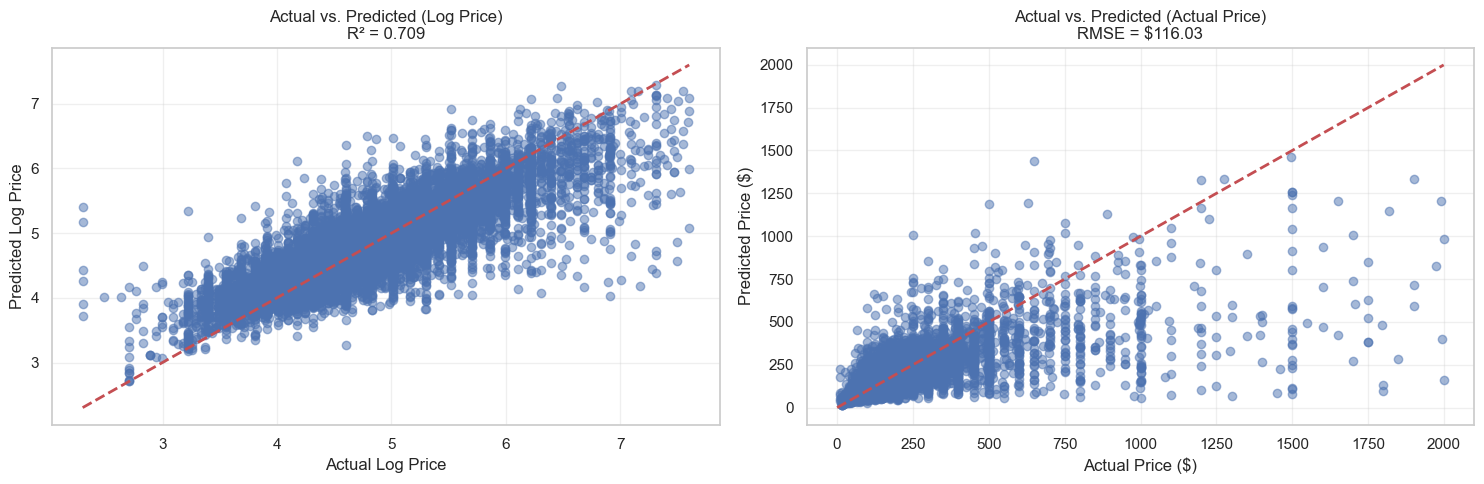

In [61]:
# 3. Visualize the model's performance
print("\n\n2. PERFORMANCE VISUALIZATIONS")
print("-" * 30)

plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted (Log Price)
plt.subplot(1, 2, 1)
max_val = max(y_test.max(), final_predictions.max())
min_val = min(y_test.min(), final_predictions.min())
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title(f'Actual vs. Predicted (Log Price)\nR² = {final_r2:.3f}')
plt.grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Actual Price)
plt.subplot(1, 2, 2)
max_val_exp = max(y_test_exp.max(), final_predictions_exp.max())
plt.scatter(y_test_exp, final_predictions_exp, alpha=0.5)
plt.plot([0, max_val_exp], [0, max_val_exp], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs. Predicted (Actual Price)\nRMSE = ${final_rmse_exp:.2f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 3: Visualization 2 - Residual Analysis Plot

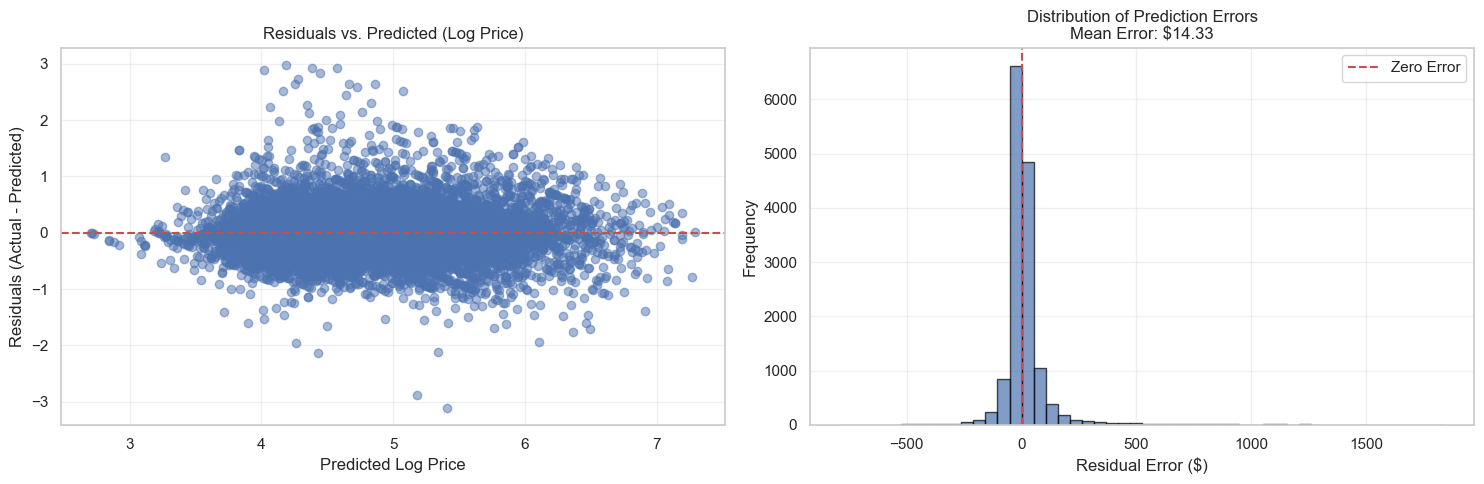


Residual Analysis (Actual Price $):
  Mean Residual Error: $14.33
  Standard Deviation of Errors: $115.14
  Minimum Error: $-787.73
  Maximum Error: $1838.80


In [63]:
# 4. Residual Analysis
residuals = y_test - final_predictions
residuals_exp = y_test_exp - final_predictions_exp

plt.figure(figsize=(15, 5))

# Plot 1: Residuals vs Predicted Values (Log Price)
plt.subplot(1, 2, 1)
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted (Log Price)')
plt.grid(True, alpha=0.3)

# Plot 2: Distribution of Residuals (Actual Price)
plt.subplot(1, 2, 2)
plt.hist(residuals_exp, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Residual Error ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Prediction Errors\nMean Error: ${residuals_exp.mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate residual statistics
print(f"\nResidual Analysis (Actual Price $):")
print(f"  Mean Residual Error: ${residuals_exp.mean():.2f}")
print(f"  Standard Deviation of Errors: ${residuals_exp.std():.2f}")
print(f"  Minimum Error: ${residuals_exp.min():.2f}")
print(f"  Maximum Error: ${residuals_exp.max():.2f}")

### Step 4: Visualization 3 - Error Distribution by Price Range

C:\Users\harsh\AppData\Local\Temp\ipykernel_4320\69751242.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_price = results_df.groupby(price_bins)['Absolute_Error_$'].agg(['mean', 'std', 'count'])


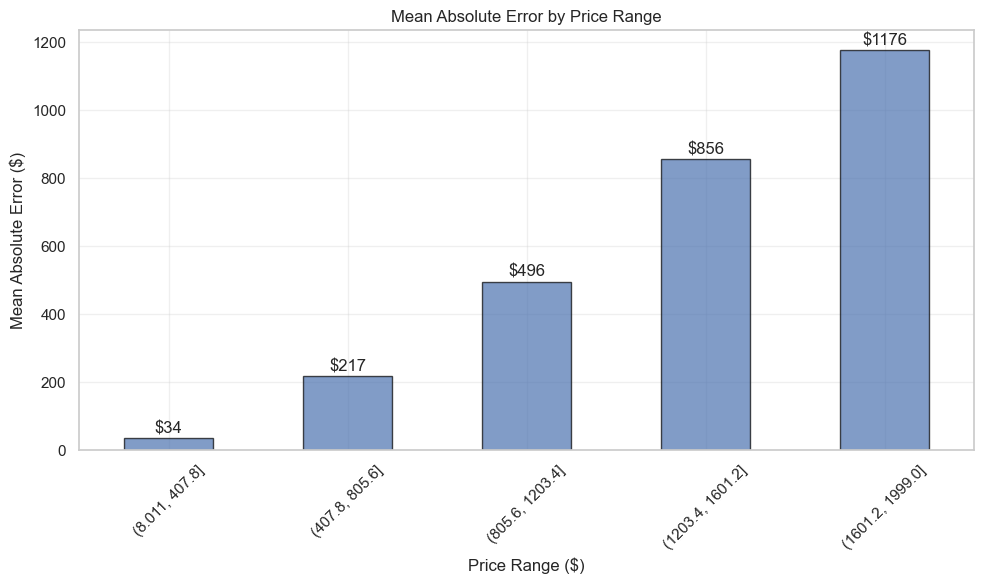


3. ERROR ANALYSIS BY PRICE RANGE
------------------------------
                         mean         std  count
Actual_Price                                    
(8.011, 407.8]      34.475300   43.551801  14057
(407.8, 805.6]     217.068883  148.730701    564
(805.6, 1203.4]    495.510649  251.312164    132
(1203.4, 1601.2]   856.303861  377.301540     46
(1601.2, 1999.0]  1175.674570  370.644219     24


In [65]:
# 5. Analyze error distribution across different price ranges
results_df = pd.DataFrame({
    'Actual_Price': y_test_exp,
    'Predicted_Price': final_predictions_exp,
    'Error_$': residuals_exp,
    'Absolute_Error_$': np.abs(residuals_exp)
})

# Create price bins
price_bins = pd.cut(results_df['Actual_Price'], bins=5)
error_by_price = results_df.groupby(price_bins)['Absolute_Error_$'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(10, 6))
error_by_price['mean'].plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Mean Absolute Error by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Mean Absolute Error ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(error_by_price['mean']):
    plt.text(i, v + 5, f'${v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n3. ERROR ANALYSIS BY PRICE RANGE")
print("-" * 30)
print(error_by_price)

### Step 5: Final Interpretation and Summary

In [67]:
# 6. Final summary and interpretation
print("\n\n4. MODEL PERFORMANCE SUMMARY AND INTERPRETATION")
print("-" * 50)

print("METRICS INTERPRETATION:")
print(f"• RMSE (${final_rmse_exp:.2f}): The standard deviation of the prediction errors.")
print("  This means our typical prediction error is about ${:.2f}.".format(final_rmse_exp))
print(f"• MAE (${final_mae_exp:.2f}): The average magnitude of prediction errors.")
print("  On average, our predictions are within ${:.2f} of the actual price.".format(final_mae_exp))
print(f"• R² ({final_r2:.3f}): The proportion of variance in price explained by the model.")
print("  Our model explains {:.1f}% of the variability in listing prices.".format(final_r2 * 100))
print(f"• MAPE ({mape:.1f}%): The average percentage error.")
print("  Our predictions are typically within {:.1f}% of the actual price.".format(mape))

print("\nRESIDUAL ANALYSIS:")
if residuals_exp.mean() < 5 and residuals_exp.mean() > -5:
    print("• The mean residual error is close to zero, indicating no systematic bias.")
else:
    print("• The model shows some systematic bias in predictions.")

if abs(residuals_exp.skew()) < 1:
    print("• Residuals are approximately normally distributed.")
else:
    print("• Residuals show some skewness, suggesting room for model improvement.")

print("\nRECOMMENDATIONS:")
print("1. The model can be used for price estimation with an expected error of ±${:.0f}.".format(final_mae_exp))
print("2. Consider feature engineering to better capture high-price listings.")
print("3. For production use, monitor performance regularly and retrain with new data.")



4. MODEL PERFORMANCE SUMMARY AND INTERPRETATION
--------------------------------------------------
METRICS INTERPRETATION:
• RMSE ($116.03): The standard deviation of the prediction errors.
  This means our typical prediction error is about $116.03.
• MAE ($49.93): The average magnitude of prediction errors.
  On average, our predictions are within $49.93 of the actual price.
• R² (0.709): The proportion of variance in price explained by the model.
  Our model explains 70.9% of the variability in listing prices.
• MAPE (29.0%): The average percentage error.
  Our predictions are typically within 29.0% of the actual price.

RESIDUAL ANALYSIS:
• The model shows some systematic bias in predictions.
• Residuals show some skewness, suggesting room for model improvement.

RECOMMENDATIONS:
1. The model can be used for price estimation with an expected error of ±$50.
2. Consider feature engineering to better capture high-price listings.
3. For production use, monitor performance regularly an

# Project Briefing

This video explains the entire project workflow:

1. **Data Exploration and Preprocessing**  
   - Analyzing dataset for trends, missing values, and outliers  
   - Data cleaning, feature engineering, transformations  

2. **Model Development**  
   - Building regression models to predict listing prices  

3. **Model Evaluation**  
   - Evaluating performance using RMSE, MAE, and R²  
## 🎥 Video Explanation
[Video Explanation](https://drive.google.com/file/d/1suGVG1myWCPpRxbsrxIRcjKEuBFk6iMI/view?usp=sharing)

